Задача 1. В некоторой лотерее участвуют игроки, выбирающие шесть чисел без замены из интервала [1, 49]. Джекпот разделяется между игроками, угадавшими все шесть чисел («выпавших лотерейных шаров»), выбранных случайным образом в розыгрыше, который проводится каждые две недели (порядок угаданных чисел не имеет значения). Если ни один из игроков не угадал каждое выпавшее число, то джекпот считается неразыгранным и добавляется к джекпоту следующего розыгрыша. Несмотря на то что эта лотерея честная в том смысле, что каждая комбинация случайно выбираемых чисел является равновероятной, было сделано следующее наблюдение: многие игроки отдают предпочтение выбору определенных чисел, например представляющих даты (т.е. большинство выбираемых чисел находится в интервале [1, 31], как будто эти числа ожидаются в большей степени, чем выбираемые случайно). Поэтому, чтобы избежать дележа джекпота, следовательно, получить максимальный выигрыш в одиночку, имеет смысл не использовать эти числа.

Проверить это предположение, установив, существует ли какая-либо связь (корреляция) между количеством шаров со значениями меньше 13 (представляющих номер месяца) и выигрышами джекпота одним человеком. Не учитывать розыгрыши, которые приводили к увеличению джекпота (т.е. без выигравших текущий джекпот). Необходимые данные lottery-draws.txt можно скачать в ресурсах.

In [ ]:
import sys
import numpy as np

def parse_line(fi):
    # skip header rows
    fi.readline()
    fi.readline()
    rollover = False
    for line in fi:
        fields = line.split()
        nwinners = int(fields[6])
        if nwinners == 0:
            rollover = True
            continue
        if rollover:
            rollover = False
            continue
        balls = np.array([int(v) for v in fields[:6]])
        jackpot_share = float(fields[7])
        nlow = sum(balls < 13)
        yield nlow, jackpot_share

with open('lottery-draws.txt') as fi:
    data = list(parse_line(fi))
data = np.array(data)

print(np.corrcoef(data, rowvar=0))

[[ 1.         -0.19909853]
 [-0.19909853  1.        ]]

Задача 2. В этом разделе мы видели, как создать графическое изображение гистограммы из массива с помощью метода pyplot.hist, но предположим, что массивы hist и bins уже созданы с использованием метода np.histogram и необходимо построить итоговую гистограмму по этим массивам. Невозможно воспользоваться pyplot.hist, потому что эта функция ожидает для обработки массив исходных данных. Необходимо использовать pyplot.bar для создания изображения по массиву hist в виде столбиковой диаграммы (bar chart, собственно, это и есть гистограмма).

In [ ]:
In [x]: print(bins)
[   0.   20.   40.   60.   80.  100.]


In [x]: bin_centres = (bins[:-1] + bins[1:])/2
In [x]: print(bin_centres)
[ 10.  30.  50.  70.  90.]


In [x]: import matplotlib.pyplot as plt
In [x]: plt.bar(bin_centres, hist, width=20, align='center')

Задача 3 Значения роста в сантиметрах в выборке из 1000 взрослых мужчин и 1000 взрослых женщин из определенной совокупности собраны в файлах данных ex6-3-f-male-heights.txt и ex6-3-f-female-heights.txt, доступных в ресурсах. Прочитать эти данные и вычислить среднее значение и стандартное отклонение по каждому полу. Создать гистограммы для этих двух наборов данных с использованием наиболее подходящего интервала и показать их графически на одном изображении. Решить эту же задачу в единицах британской системы (в футах и дюймах).

In [ ]:
fsample = np.loadtxt('ex6-3-f-female-heights.txt').flatten()
msample = np.loadtxt('ex6-3-f-male-heights.txt').flatten()
heights = np.zeros((1000,), dtype={'names': ['female', 'male'],
                                                                      'formats': ['f8', 'f8']})
heights['female'] = np.loadtxt('ex6-3-f-female-heights.txt').flatten()
heights['male'] = np.loadtxt('ex6-3-f-male-heights.txt').flatten()
fav, fstd = heights['female'].mean(), heights['female'].std()
mav, mstd = heights['male'].mean(), heights['male'].std()
all_heights_view = heights.view((('f8', 2))).flatten()
all_heights.min(), all_heights.max()
(138.5, 208.30000000000001)
bins = np.linspace(135, 210, 16)
mhist, _, _ = plt.hist(heights['male'], bins, color='b')
fhist, _, _ = plt.hist(heights['female'], bins, alpha=0.75, color='m'
print('Height (cm)  Female  Male')
print('-'*27)
for b, f, m in np.vstack((bins[:-1], fhist, mhist)).T:
    print('  {:d}-{:d}     {:3d}    {:3d}'.format(int(b), int(b)+5,
                                                   int(f), int(m)))
print('-'*27)
print('Mean (cm):   {:5.1f}  {:5.1f}'.format(fav, mav))
print(' Std (cm):   {:5.1f}  {:5.1f}'.format(fstd, mstd))
print('-'*27)

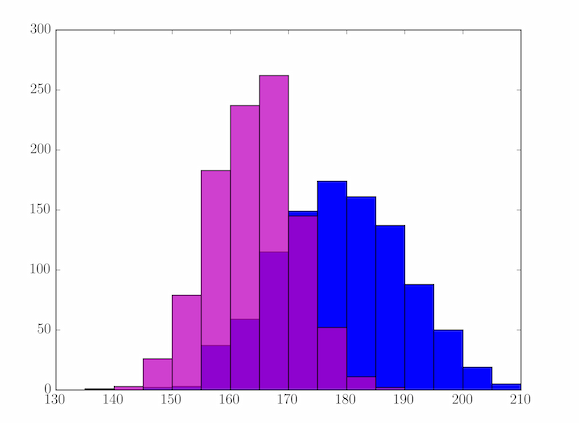

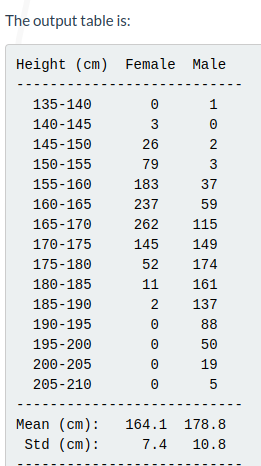